# Machine Learning Engineer Nanodegree
## Capstone Project


In [89]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("answers.csv")

# Success - Display the first record
display(data.head(n=5))

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [90]:
#  Total number of records
n_records = len(data)
attendance = data['attendance']
#  Number of records where attendance = 0,1,2,3,4 respectively
n_0 = len(data[data.attendance == 0])
n_1 = len(data[data.attendance == 1])
n_2 = len(data[data.attendance == 2])
n_3 = len(data[data.attendance == 3])
n_4 = len(data[data.attendance == 4])
# Print the results of percentage of records where attendance = 0,1,2,3,4 respectively
print("Total number of records: {}".format(n_records))
print("The percentage of students with attendane of value 0 is: {}%".format(((n_0)/n_records)*100))
print("The percentage of students with attendane of value 1 is: {}%".format(((n_1)/n_records)*100))
print("The percentage of students with attendane of value 2 is: {}%".format(((n_2)/n_records)*100))
print("The percentage of students with attendane of value 3 is: {}%".format(((n_3)/n_records)*100))
print("The percentage of students with attendane of value 4 is: {}%".format(((n_4)/n_records)*100))

Total number of records: 5820
The percentage of students with attendane of value 0 is: 32.68041237113402%
The percentage of students with attendane of value 1 is: 17.66323024054983%
The percentage of students with attendane of value 2 is: 13.608247422680412%
The percentage of students with attendane of value 3 is: 21.512027491408936%
The percentage of students with attendane of value 4 is: 14.536082474226806%


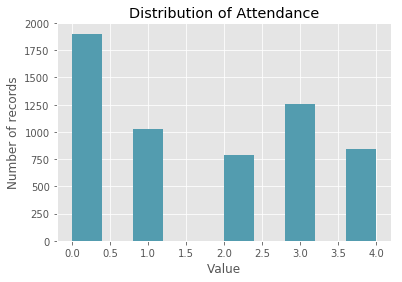

In [91]:
import matplotlib.pyplot as plt
# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
histogram(data = data['attendance']
           , x_label = 'Value'
           , y_label = 'Number of records'
           , title = 'Distribution of Attendance')



In [92]:
# Import train_test_split
from sklearn.model_selection import train_test_split
attendance = data['attendance']
features = data.drop('attendance', axis = 1)
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    attendance, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4656 samples.
Testing set has 1164 samples.


In [104]:
#Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end - start
            
    #  Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5, average = None)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5, average = None)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

GradientBoostingClassifier trained on 46 samples.
GradientBoostingClassifier trained on 465 samples.
GradientBoostingClassifier trained on 4656 samples.
DecisionTreeClassifier trained on 46 samples.
DecisionTreeClassifier trained on 465 samples.
DecisionTreeClassifier trained on 4656 samples.


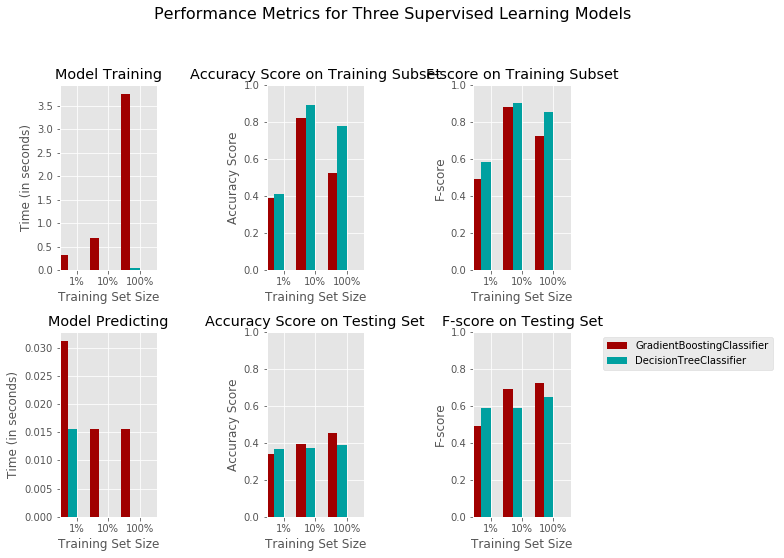

In [105]:
# Import the models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state = 0)
clf_B = DecisionTreeClassifier(random_state = 0)



# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.10 * samples_100) 
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

Using Gradient Boosting Classifier: 


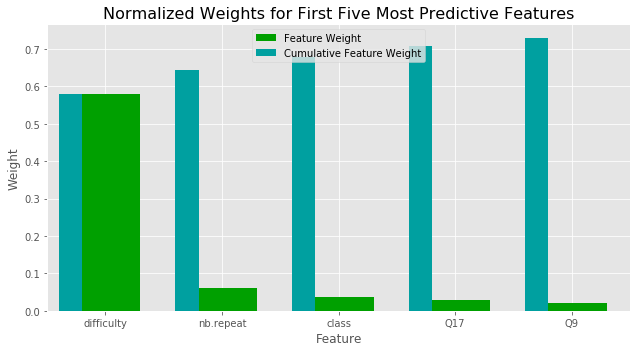

Using Decision Tree Classifier: 


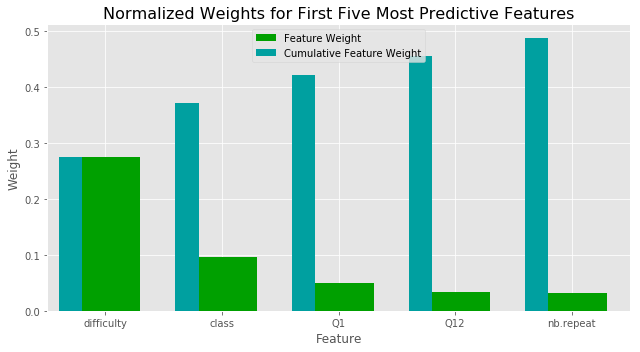

In [109]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
 
# Plot
print("Using Gradient Boosting Classifier: ")
vs.feature_plot(importances, X_train, y_train)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
 
# Plot
print("Using Decision Tree Classifier: ")
vs.feature_plot(importances, X_train, y_train)

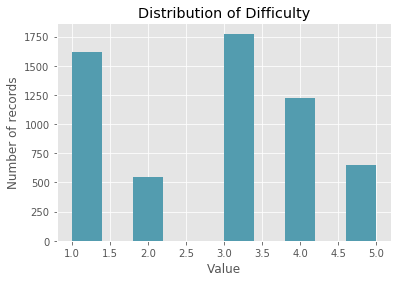

In [112]:
import matplotlib.pyplot as plt
# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
histogram(data = data['difficulty']
           , x_label = 'Value'
           , y_label = 'Number of records'
           , title = 'Distribution of Difficulty')

